# Categorical Exploration

- Explore a categorical column, such as 'MS Zoning' by acessing the column and displaying its unique values
- Visualize the counts of a categorical column using a bar chart
- Visualize the counts of a categorical column using a horizontal bar chart

In [1]:
# import relevant libraries
import numpy as np
import pandas as pd



# String INTs Function
def shrink_ints(df):
    mapping = {}
    for col in df.dtypes[df.dtypes == 'int64[pyarrow]'].index:
        max_ = df[col].max()
        min_ = df[col].min()
        if min_ < 0:
            continue
        elif max_ < 255:
            mapping[col] = 'uint8[pyarrow]'
        elif max_ < 65_535:
            mapping[col] = 'uint16[pyarrow]'
        elif max_ < 4294967295:
            mapping[col] = 'uint64[pyarrow]'
        return df.astype(mapping)




# Creating a clean_housing function
def clean_housing(df):
    return(
    df
    # Using the assign method to update records
    .assign(
        # Update the 
        **df
            # Select the string cols in the df
            .select_dtypes('string')
            # replace all the NA values in the df with Missing
            .replace('', 'Missing')
            # Convert to category
            .astype('category'),
        # Using dictionary unpacking to update the Garage col with clipped col
        **{'Garage Yr Blt': df['Garage Yr Blt'].clip(upper=df['Year Built'].max())}      
    )
    # Convert the numerical variables to the right datatypes to save memory
    .pipe(shrink_ints)
    )



# Execute the Pipeline
url = 'AmesHousing.csv'

# Load the data
# Engine = Pyarrow makes the back-end quicker with pyarrow and the pyarrow data types
df = pd.read_csv(url, engine='pyarrow', dtype_backend='pyarrow')

# Clean the data and Preview the result
aimes_df = clean_housing(df)

In [2]:
# Preview the data
aimes_df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141,31770,Pave,NA,IR1,Lvl,...,0,NA,NA,NA,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80,11622,Pave,NA,Reg,Lvl,...,0,NA,MnPrv,NA,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81,14267,Pave,NA,IR1,Lvl,...,0,NA,NA,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93,11160,Pave,NA,Reg,Lvl,...,0,NA,NA,NA,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74,13830,Pave,NA,IR1,Lvl,...,0,NA,MnPrv,NA,0,3,2010,WD,Normal,189900


In [3]:
# Exploring Categoricals
(
    aimes_df
    # Get the Zoning col
    ['MS Zoning']
)

0       RL
1       RH
2       RL
3       RL
4       RL
        ..
2925    RL
2926    RL
2927    RL
2928    RL
2929    RL
Name: MS Zoning, Length: 2930, dtype: category
Categories (7, string[pyarrow]): [A (agr), C (all), FV, I (all), RH, RL, RM]

In [4]:
# Exploring Categoricals
(
    aimes_df
    # Get the Zoning col
    ['MS Zoning']
    # Get the value counts
    .value_counts()
)

MS Zoning
RL         2273
RM          462
FV          139
RH           27
C (all)      25
A (agr)       2
I (all)       2
Name: count, dtype: int64

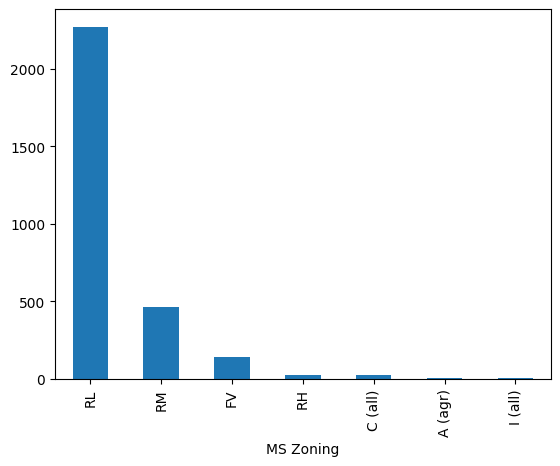

In [9]:
# Visualizing Categorical Data
import matplotlib

# Exploring Categoricals
(
    aimes_df
    # Get the Zoning col
    ['MS Zoning']
    # Get the value counts
    .value_counts()
    # Plot the Bar plot (index maps to the x-axis and values map unto the y-axis)
    .plot.bar()
);

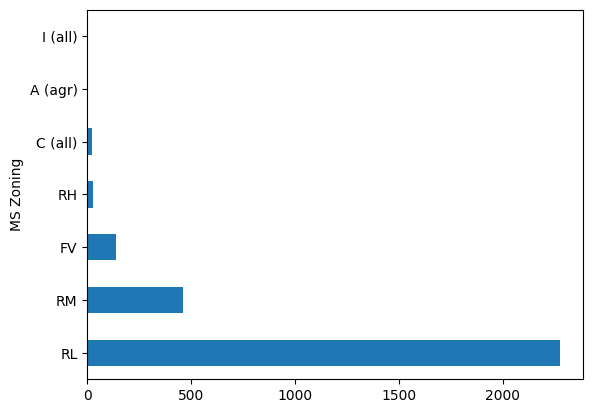

In [11]:
# Visualizing Categorical Data

import matplotlib.pyplot as plt

# Exploring Categoricals
(
    aimes_df
    # Get the Zoning col
    ['MS Zoning']
    # Get the value counts
    .value_counts()
    # Plot the Bar plot (index maps to the x-axis and values map unto the y-axis)
    .plot.barh()
);

## Histograms and Distributions


In [13]:
(
    aimes_df
    # Select the Sale Price column
    ['SalePrice']
    # Get your summary statistics
    .describe()
)

count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: double[pyarrow]

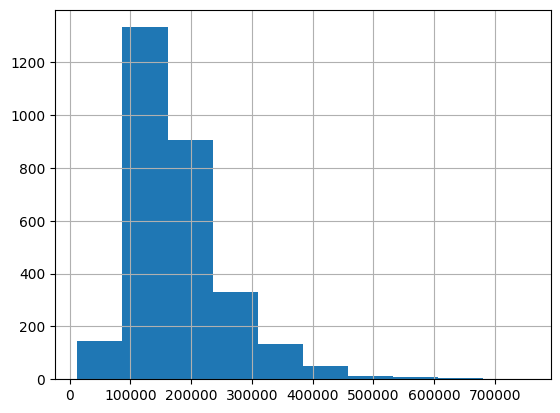

In [15]:
# Visualizing Numerical Cols

(
    aimes_df
    # Select the Sale Price column
    ['SalePrice']
    # Visualize the col
    .hist()
);

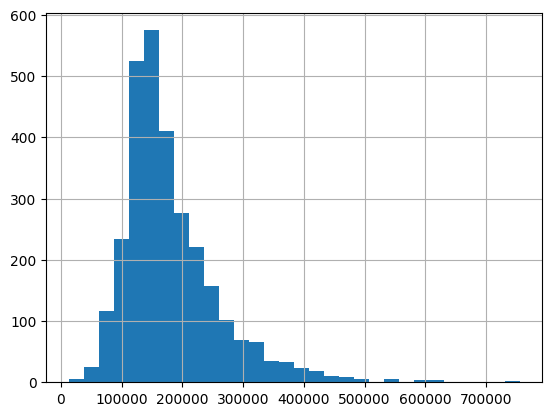

In [16]:
# Visualizing Numerical Cols

(
    aimes_df
    # Select the Sale Price column
    ['SalePrice']
    # Visualize the col
    .hist(bins=30)
);

## Outliers and Z-Score

- Calc the Z-score for the 'SalesPrice' column
- Identify outliers based on the z-score by assigning a boolean col
- Identify outliers using the IQR method

In [18]:
def calc_z(df, col):
    mean = df[col].mean()
    std = df[col].std()
    return (df[col] - mean) / std


(
    aimes_df
    # Calc the z-score
    .pipe(calc_z, col='SalePrice')
)

0       0.428156
1      -0.948795
2      -0.110107
3       0.791170
4       0.113961
          ...   
2925   -0.479380
2926   -0.623334
2927   -0.610816
2928   -0.135142
2929    0.090177
Name: SalePrice, Length: 2930, dtype: double[pyarrow]

In [20]:
(
    aimes_df
    # Using the calc_z with a function
    .assign(sp_z_score = calc_z(df=aimes_df, col='SalePrice'))
    # Filter records with abs(z) > 3
    .query("sp_z_score.abs() >= 3")
)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,sp_z_score
15,16,527216070,60,RL,47,53504,Pave,NA,IR2,HLS,...,NA,NA,NA,0,6,2010,WD,Normal,538000,4.471382
44,45,528150070,20,RL,100,12919,Pave,NA,IR1,Lvl,...,NA,NA,NA,0,3,2010,New,Partial,611657,5.393401
46,47,528176010,20,RL,110,14300,Pave,NA,Reg,HLS,...,NA,NA,NA,0,6,2010,WD,Normal,500000,3.995709
366,367,527214050,20,RL,63,17423,Pave,NA,IR1,Lvl,...,NA,NA,NA,0,7,2009,New,Partial,501837,4.018704
421,422,528102140,60,RL,110,14257,Pave,NA,Reg,Lvl,...,NA,NA,NA,0,6,2009,WD,Normal,462000,3.520035
422,423,528104070,60,RL,104,13518,Pave,NA,Reg,Lvl,...,NA,NA,NA,0,7,2009,New,Partial,485000,3.807943
423,424,528106020,20,RL,105,15431,Pave,NA,Reg,Lvl,...,NA,NA,NA,0,4,2009,WD,Normal,555000,4.684184
431,432,528110010,60,RL,97,13478,Pave,NA,IR1,Lvl,...,NA,NA,NA,0,6,2009,ConLI,Normal,451950,3.394232
432,433,528110020,20,RL,105,13693,Pave,NA,Reg,Lvl,...,NA,NA,NA,0,3,2009,WD,Normal,610000,5.372659
433,434,528110090,60,RL,107,13891,Pave,NA,Reg,Lvl,...,NA,NA,NA,0,1,2009,New,Partial,582933,5.033841


In [27]:
def calc_iqr_outlier(df, col):
    ser = df[col]
    iqr = ser.quantile(0.75) - ser.quantile(0.25)
    med = ser.median()
    small_mask = ser < (med - (iqr * 3))
    large_mask = ser > (med + (iqr * 3))
    return small_mask | large_mask


(
    aimes_df
    # Create the IQR outlier col
    .assign(sp_iqr_outlier = calc_iqr_outlier(df=aimes_df, col='SalePrice'))
    # Filter for Outliers
    .query("sp_iqr_outlier")
)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,sp_iqr_outlier
15,16,527216070,60,RL,47,53504,Pave,NA,IR2,HLS,...,NA,NA,NA,0,6,2010,WD,Normal,538000,True
44,45,528150070,20,RL,100,12919,Pave,NA,IR1,Lvl,...,NA,NA,NA,0,3,2010,New,Partial,611657,True
46,47,528176010,20,RL,110,14300,Pave,NA,Reg,HLS,...,NA,NA,NA,0,6,2010,WD,Normal,500000,True
366,367,527214050,20,RL,63,17423,Pave,NA,IR1,Lvl,...,NA,NA,NA,0,7,2009,New,Partial,501837,True
421,422,528102140,60,RL,110,14257,Pave,NA,Reg,Lvl,...,NA,NA,NA,0,6,2009,WD,Normal,462000,True
422,423,528104070,60,RL,104,13518,Pave,NA,Reg,Lvl,...,NA,NA,NA,0,7,2009,New,Partial,485000,True
423,424,528106020,20,RL,105,15431,Pave,NA,Reg,Lvl,...,NA,NA,NA,0,4,2009,WD,Normal,555000,True
431,432,528110010,60,RL,97,13478,Pave,NA,IR1,Lvl,...,NA,NA,NA,0,6,2009,ConLI,Normal,451950,True
432,433,528110020,20,RL,105,13693,Pave,NA,Reg,Lvl,...,NA,NA,NA,0,3,2009,WD,Normal,610000,True
433,434,528110090,60,RL,107,13891,Pave,NA,Reg,Lvl,...,NA,NA,NA,0,1,2009,New,Partial,582933,True


## Calculating Correlation

Goals:
- Calculate the Pearson Correlation
- Calculate the Spearman Correlation
- Color a correlation matrix appropriately


In [36]:
# Pearson Correlation
(
    aimes_df
    # Run correlation
    .corr(numeric_only=True)
    # style the corr matrix
    .style
    .background_gradient(cmap='RdBu', vmin=-1)
)

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
Order,1.000000,0.173593,0.011797,-0.007034,0.031354,-0.048500,-0.011054,-0.052319,-0.075566,-0.030907,-0.032321,-0.002773,0.005780,-0.028719,-0.013201,-0.000417,0.013589,-0.009342,-0.042539,0.024978,-0.044985,-0.039749,0.015424,-0.017685,0.002612,-0.019156,-0.054580,-0.036185,-0.035435,-0.011292,0.016355,0.027908,-0.024975,0.004307,0.052518,-0.006083,0.133365,-0.975993,-0.031408
PID,0.173593,1.000000,-0.001281,-0.096918,0.034868,-0.263147,0.104451,-0.343388,-0.157111,-0.229283,-0.098375,-0.001145,-0.087707,-0.189642,-0.141902,-0.003289,0.056940,-0.107579,-0.037759,0.004328,-0.171431,-0.166636,0.006345,0.076470,-0.068981,-0.108056,-0.263692,-0.237484,-0.210606,-0.051135,-0.071311,0.162519,-0.024894,-0.025735,-0.002845,-0.008260,-0.050455,0.009579,-0.246521
MS SubClass,0.011797,-0.001281,1.000000,-0.420135,-0.204613,0.039419,-0.067349,0.036579,0.043397,0.002730,-0.060075,-0.070946,-0.130421,-0.219445,-0.247828,0.304237,0.025765,0.068061,0.013701,-0.003329,0.134631,0.175879,-0.019208,0.257698,0.031898,-0.049955,0.092526,-0.045883,-0.103239,-0.017310,-0.014823,-0.022866,-0.037956,-0.050614,-0.003434,-0.029254,0.000350,-0.017905,-0.085092
Lot Frontage,-0.007034,-0.096918,-0.420135,1.000000,0.491313,0.212042,-0.074448,0.121562,0.091712,0.222407,0.215583,0.045999,0.116743,0.353773,0.457391,0.029187,0.005249,0.383822,0.108915,-0.024724,0.184521,0.041880,0.240442,0.005407,0.353137,0.257255,0.077801,0.308706,0.358505,0.120084,0.163040,0.012758,0.028564,0.076666,0.173947,0.044476,0.011085,-0.007547,0.357318
Lot Area,0.031354,0.034868,-0.204613,0.491313,1.000000,0.097188,-0.034759,0.023258,0.021682,0.126830,0.191555,0.083150,0.023658,0.253589,0.332235,0.032996,0.000812,0.285599,0.125877,0.026903,0.127433,0.035497,0.136569,-0.020301,0.216597,0.256989,-0.008383,0.179512,0.212822,0.157212,0.103760,0.021868,0.016243,0.055044,0.093775,0.069188,0.003859,-0.023085,0.266549
Overall Qual,-0.048500,-0.263147,0.039419,0.212042,0.097188,1.000000,-0.094812,0.597027,0.569609,0.429418,0.284118,-0.041287,0.270058,0.547294,0.477837,0.241402,-0.048680,0.570556,0.167858,-0.041647,0.522263,0.268853,0.063291,-0.159744,0.380693,0.393007,0.575140,0.599545,0.563503,0.255663,0.298412,-0.140332,0.018240,0.041615,0.030399,0.005179,0.031103,-0.020719,0.799262
Overall Cond,-0.011054,0.104451,-0.067349,-0.074448,-0.034759,-0.094812,1.000000,-0.368773,0.047680,-0.135340,-0.050935,0.041134,-0.136819,-0.173344,-0.157052,0.006218,0.009175,-0.115643,-0.042766,0.084455,-0.214316,-0.088127,-0.006137,-0.086386,-0.089816,-0.031702,-0.329247,-0.181557,-0.153754,0.020344,-0.068934,0.071459,0.043852,0.044055,-0.016787,0.034056,-0.007295,0.031207,-0.101697
Year Built,-0.052319,-0.343388,0.036579,0.121562,0.023258,0.597027,-0.368773,1.000000,0.612095,0.313292,0.279870,-0.027415,0.128998,0.407526,0.310463,0.016828,-0.144282,0.241726,0.211849,-0.030626,0.469406,0.269268,-0.055093,-0.137852,0.111919,0.170672,0.843814,0.537443,0.480131,0.228964,0.198365,-0.374364,0.015803,-0.041436,0.002213,-0.011011,0.014577,-0.013197,0.558426
Year Remod/Add,-0.075566,-0.157111,0.043397,0.091712,0.021682,0.569609,0.047680,0.612095,1.000000,0.196928,0.151790,-0.062129,0.164805,0.297481,0.242108,0.158939,-0.060365,0.316855,0.134387,-0.046292,0.457266,0.211771,-0.021536,-0.142404,0.197528,0.133322,0.658758,0.425403,0.376438,0.217857,0.241748,-0.220383,0.037412,-0.046888,-0.011410,-0.003132,0.018048,0.032652,0.532974
Mas Vnr Area,-0.030907,-0.229283,0.002730,0.222407,0.126830,0.429418,-0.135340,0.313292,0.196928,1.000000,0.301872,-0.016019,0.091668,0

In [34]:
# Spearman's Correlation Coeff
(
    aimes_df
    .corr(method='spearman', numeric_only=True)
    .style
    .background_gradient(cmap='RdBu', vmin=-1)
)

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
Order,1.000000,0.205863,0.015074,-0.024209,0.012684,-0.049175,-0.015534,-0.056978,-0.084144,-0.041604,-0.034229,-0.018105,0.007011,-0.023661,-0.007155,-0.003142,0.026532,-0.023809,-0.041665,0.019375,-0.048754,-0.036492,0.014230,-0.015031,0.001629,-0.022008,-0.056214,-0.037003,-0.034251,-0.025811,0.000760,0.025225,-0.015117,0.006032,0.047986,-0.038106,0.142150,-0.977264,-0.035703
PID,0.205863,1.000000,-0.026875,-0.096820,-0.040342,-0.314353,0.111922,-0.314979,-0.208414,-0.237169,-0.050349,0.012860,-0.131413,-0.188111,-0.130427,-0.069092,0.047204,-0.165111,-0.009074,0.035377,-0.235566,-0.186542,-0.014036,0.084954,-0.130301,-0.151539,-0.274244,-0.276663,-0.207054,-0.092368,-0.176972,0.152769,0.005809,0.006353,0.003222,0.018754,-0.051290,0.003198,-0.270660
MS SubClass,0.015074,-0.026875,1.000000,-0.363408,-0.320550,0.103475,-0.065550,0.035632,0.015590,-0.009247,-0.098222,-0.093004,-0.113501,-0.300856,-0.278139,0.478281,0.059254,0.186612,-0.040172,0.004709,0.198671,0.266447,0.056779,0.269444,0.137183,0.010696,0.084326,0.020071,-0.047607,0.019062,0.030639,-0.005318,-0.033196,-0.039486,-0.001964,-0.031959,0.014999,-0.021873,0.001973
Lot Frontage,-0.024209,-0.096820,-0.363408,1.000000,0.659412,0.223162,-0.104785,0.192888,0.134932,0.275334,0.156582,0.044513,0.092700,0.375535,0.442289,0.000692,-0.042646,0.361933,0.103704,-0.029865,0.209843,0.077310,0.288409,0.010360,0.362169,0.248728,0.126930,0.348630,0.375849,0.118401,0.173802,-0.092787,0.010447,0.086195,0.083211,0.037856,0.013041,0.003559,0.397980
Lot Area,0.012684,-0.040342,-0.320550,0.659412,1.000000,0.196855,-0.079006,0.121151,0.103266,0.205822,0.171376,0.057461,0.068211,0.352739,0.439129,0.064565,-0.016875,0.418321,0.106726,0.009234,0.224679,0.128025,0.298550,-0.025662,0.383795,0.311907,0.073599,0.344115,0.370980,0.177609,0.171777,-0.042467,0.029028,0.091527,0.083071,0.073861,0.004774,-0.021720,0.429249
Overall Qual,-0.049175,-0.314353,0.103475,0.223162,0.196855,1.000000,-0.189638,0.664590,0.579323,0.423202,0.179239,-0.091898,0.239273,0.472852,0.415988,0.237677,-0.050242,0.577780,0.148886,-0.047082,0.556720,0.294043,0.077886,-0.170318,0.378023,0.419263,0.638165,0.611424,0.547140,0.290231,0.440433,-0.192093,0.019398,0.026212,0.033057,-0.076443,0.029163,-0.017015,0.808800
Overall Cond,-0.015534,0.111922,-0.065550,-0.104785,-0.079006,-0.189638,1.000000,-0.422306,-0.075119,-0.181996,-0.020644,0.095954,-0.123413,-0.223382,-0.187027,-0.012957,0.018427,-0.189100,-0.045087,0.089080,-0.282743,-0.106949,-0.012151,-0.084478,-0.126437,-0.056648,-0.395204,-0.258175,-0.216048,-0.036363,-0.175446,0.134745,0.044303,0.050333,-0.020386,0.061434,-0.006480,0.039612,-0.165657
Year Built,-0.056978,-0.314979,0.035632,0.192888,0.121151,0.664590,-0.422306,1.000000,0.707678,0.398747,0.214515,-0.095639,0.124441,0.442113,0.324522,0.022695,-0.123324,0.317367,0.187555,-0.054695,0.536116,0.265468,-0.032275,-0.129373,0.181709,0.199048,0.900386,0.600675,0.533612,0.296569,0.402890,-0.434250,0.011180,-0.066507,0.004203,-0.079103,0.016111,-0.009527,0.680822
Year Remod/Add,-0.084144,-0.208414,0.015590,0.134932,0.103266,0.579323,-0.075119,0.707678,1.000000,0.249285,0.087763,-0.116761,0.167045,0.309842,0.250180,0.090110,-0.058727,0.318917,0.120280,-0.057018,0.455856,0.179883,-0.032359,-0.144737,0.207894,0.148938,0.742208,0.460615,0.409481,0.249966,0.372293,-0.268871,0.049288,-0.058677,-0.011139,-0.057701,0.014296,0.041084,0.601454
Mas Vnr Area,-0.041604,-0.237169,-0.009247,0.275334,0.205822,0.423202,-0.181996,0.398747,0.249285,1.000000,0.270651,-0.028671,0.055245,

## Scatterplots 
- Create a scatterplot
- Set transparency
- Jitter plot values

<Axes: xlabel='Year Built', ylabel='Overall Cond'>

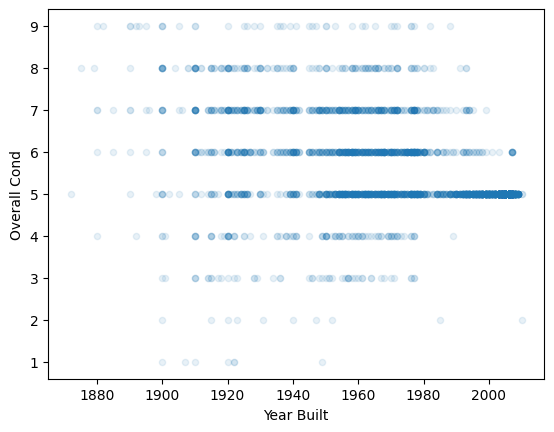

In [41]:
(
    aimes_df
    # Lets plot a scatterplot with alpha (ALWAYS use alpha)
    .plot.scatter(x='Year Built', y='Overall Cond', alpha=0.1)
)

In [40]:
# Corr b/n Year Blt and Overall Cond
(
    aimes_df
    # Select the Year Blt Col
    ['Year Built']
    # Correlation with Overall Cond
    .corr(aimes_df['Overall Cond'], method='spearman')
)

-0.42230619262743263

<Axes: xlabel='Year Built', ylabel='Overall Cond'>

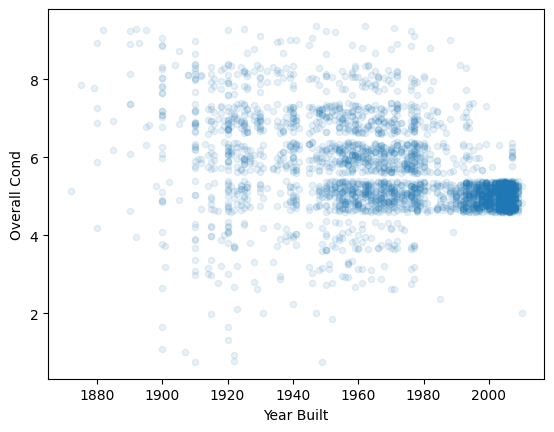

In [42]:
# Jitter plot
(
    aimes_df
    .assign(**{'Overall Cond': aimes_df['Overall Cond'] + np.random.random(len(aimes_df))*0.8 - 0.4})
    .plot.scatter(x='Year Built', y='Overall Cond', alpha=0.1)
)

In [43]:
np.random.random(len(aimes_df))*0.8

array([0.4600994 , 0.71301814, 0.20291821, ..., 0.69676459, 0.67740399,
       0.69484121])

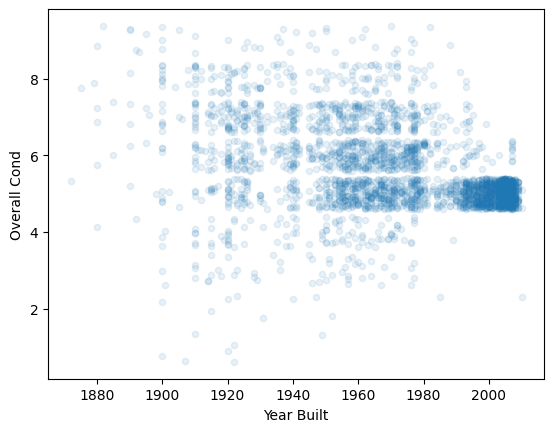

In [47]:
def jitter_viz(df_, col, amount=0.5):
    return(
        df_[col] + np.random.random(len(df_))*amount - (amount/2)
          )

(
    aimes_df
    .assign(**{'Overall Cond': jitter_viz(df_=aimes_df, col='Overall Cond', amount=0.8)})
    .plot.scatter(x='Year Built', y='Overall Cond', alpha=0.1)
);

## Visualizing Categorical and Numerical Values

- Create a boxplot of a single column
- Create a box plot of multiple columns
- Use the `.pivot` method
- Use seaborn

<Axes: >

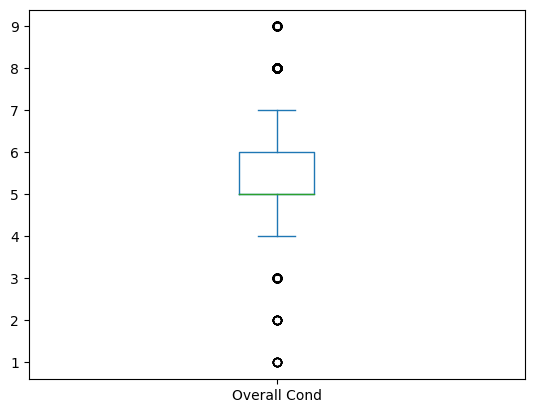

In [48]:
(
    aimes_df
    .plot
    .box(x='Year Built', y='Overall Cond')
)

<Axes: >

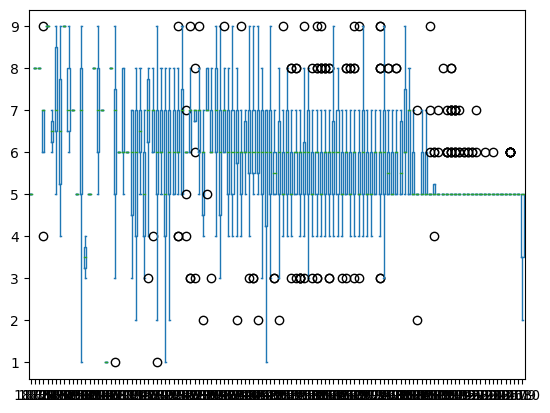

In [51]:
(
    aimes_df
    .pivot(columns='Year Built', values='Overall Cond')
    .apply(lambda ser: ser[~ser.isna()].reset_index(drop=True))
    .plot.box()
)

<Axes: >

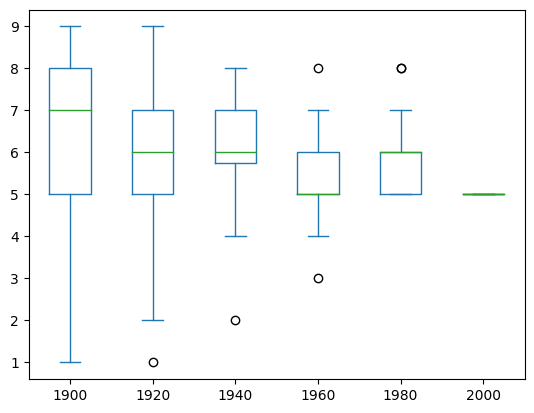

In [55]:
(
    aimes_df
    .pivot(columns='Year Built', values='Overall Cond')
    .apply(lambda ser: ser[~ser.isna()].reset_index(drop=True))
    .loc[ : , [1900, 1920, 1940, 1960, 1980, 2000]]
    .plot.box()
)

<Axes: >

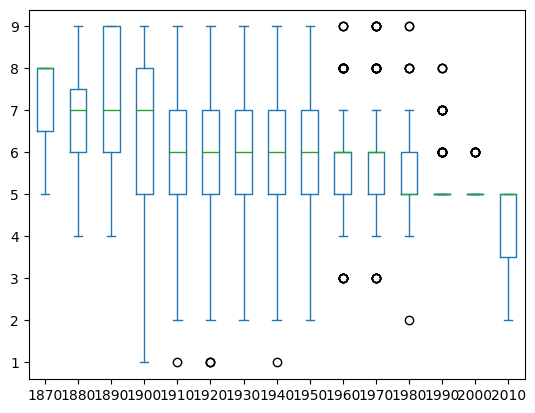

In [59]:
# Group by Decade
(
    aimes_df
    .assign(decade=(aimes_df['Year Built']//10) * 10)
    .pivot(columns='decade', values='Overall Cond')
    .apply(lambda ser: ser[~ser.isna()].reset_index(drop=True))
    .plot.box()
)

<Axes: xlabel='Year Built', ylabel='Overall Cond'>

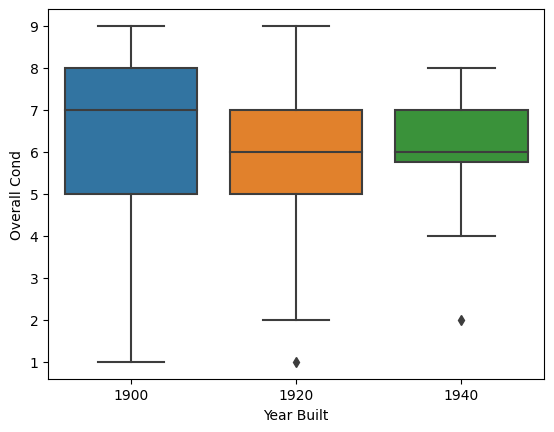

In [62]:
import seaborn as sns

sns.boxplot(data=aimes_df, x='Year Built', y='Overall Cond', order=[1900, 1920, 1940])

<Axes: xlabel='Year Built', ylabel='Overall Cond'>

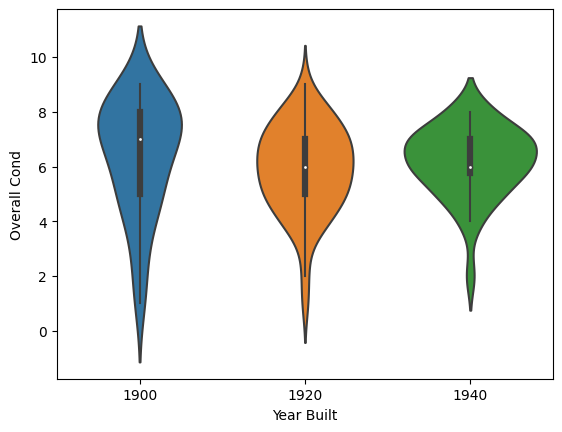

In [63]:
# Violin Plot

sns.violinplot(data=aimes_df, x='Year Built', y='Overall Cond', order=[1900, 1920, 1940])

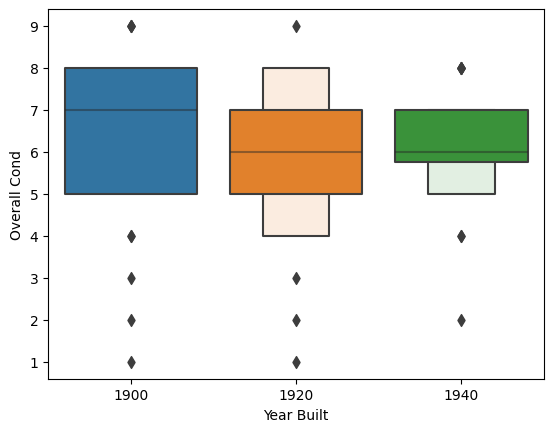

In [65]:
# Boxen Plot

sns.boxenplot(data=aimes_df, x='Year Built', y='Overall Cond', order=[1900, 1920, 1940]);

## Comparing Two Categorical Columns
- Create a cross-tabulation
- Style the Cross-Tabulation Table
- Explore documentation of the `.background_gradient` method od pandas styling
- Create a stacked bar plot of cross-tabulation

In [66]:
aimes_df.dtypes

Order             uint16[pyarrow]
PID                int64[pyarrow]
MS SubClass        int64[pyarrow]
MS Zoning                category
Lot Frontage       int64[pyarrow]
                       ...       
Mo Sold            int64[pyarrow]
Yr Sold            int64[pyarrow]
Sale Type                category
Sale Condition           category
SalePrice          int64[pyarrow]
Length: 82, dtype: object

In [69]:
(
    aimes_df
    # Groupby 2 cols
    .groupby(['Overall Qual', 'Bsmt Cond'])
    # Size/count
    .size()
    # Lets unstack - Take the Bsmt Cond and place in the col
    .unstack()
)

Bsmt Cond,Ex,Fa,Gd,Missing,NA,Po,TA
Overall Qual,,,,,,,
1,0,0,0,0,3,1,0
2,0,4,0,0,4,0,5
3,0,9,0,0,10,0,21
4,0,16,2,1,24,1,182
5,1,39,24,0,32,2,727
6,1,28,28,0,3,0,672
7,0,5,33,0,3,0,561
8,1,3,25,0,0,1,320
9,0,0,9,0,0,0,98


In [70]:
# Using the crosstab method to perfrom the above
(
    pd.crosstab(index=aimes_df['Overall Qual'], columns=aimes_df['Bsmt Cond'])
)

Bsmt Cond,Ex,Fa,Gd,Missing,NA,Po,TA
Overall Qual,,,,,,,
1,0,0,0,0,3,1,0
2,0,4,0,0,4,0,5
3,0,9,0,0,10,0,21
4,0,16,2,1,24,1,182
5,1,39,24,0,32,2,727
6,1,28,28,0,3,0,672
7,0,5,33,0,3,0,561
8,1,3,25,0,0,1,320
9,0,0,9,0,0,0,98


In [71]:
# Using the crosstab method to perfrom the above
(
    pd.crosstab(index=aimes_df['Overall Qual'], columns=aimes_df['Bsmt Cond'])
    .style
    .background_gradient(cmap='viridis', axis=None)
)

Bsmt Cond,Ex,Fa,Gd,Missing,NA,Po,TA
Overall Qual,,,,,,,
1,0,0,0,0,3,1,0
2,0,4,0,0,4,0,5
3,0,9,0,0,10,0,21
4,0,16,2,1,24,1,182
5,1,39,24,0,32,2,727
6,1,28,28,0,3,0,672
7,0,5,33,0,3,0,561
8,1,3,25,0,0,1,320
9,0,0,9,0,0,0,98


In [73]:
# Using the crosstab method to perform the above
# Ex: Excellent
# Gd: Good
# TA: Typical
# Fa: Fair
# Po: Poor
(
    pd.crosstab(index=aimes_df['Overall Qual'], columns=aimes_df['Bsmt Cond'])
    # Select relevant cols
    .loc[:, ['Ex', 'Gd', 'TA', 'Fa', 'Po', 'Missing', 'NA']]
    .style
    .background_gradient(cmap='viridis', axis=None)
)

Bsmt Cond,Ex,Gd,TA,Fa,Po,Missing,NA
Overall Qual,,,,,,,
1,0,0,0,0,1,0,3
2,0,0,5,4,0,0,4
3,0,0,21,9,0,0,10
4,0,2,182,16,1,1,24
5,1,24,727,39,2,0,32
6,1,28,672,28,0,0,3
7,0,33,561,5,0,0,3
8,1,25,320,3,1,0,0
9,0,9,98,0,0,0,0


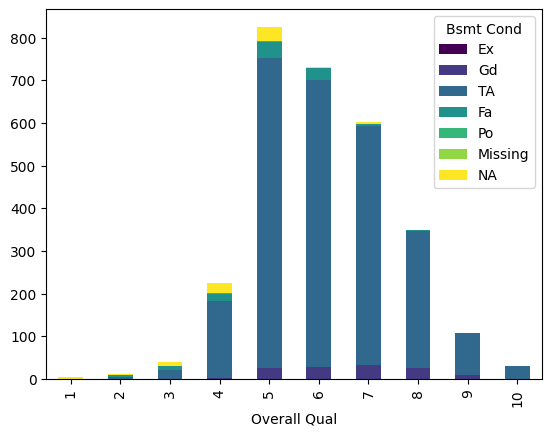

In [75]:
# Using the crosstab method to perform the above
# Ex: Excellent
# Gd: Good
# TA: Typical
# Fa: Fair
# Po: Poor
(
    pd.crosstab(index=aimes_df['Overall Qual'], columns=aimes_df['Bsmt Cond'])
    # Select relevant cols
    .loc[:, ['Ex', 'Gd', 'TA', 'Fa', 'Po', 'Missing', 'NA']]
    # Bar plot
    .plot.bar(stacked=True,
              cmap='viridis'
             )
);